<a href="https://colab.research.google.com/github/keylperez/SchedulingAlgorithms/blob/main/NP_SJF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shortest Job First

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Process:
    def __init__(self, array):
        self.processArr = array
        self.averageWaitingTime = 0
        self.totalTime = 0

    def calculateAverageWaitingTime(self):
        sum = 0
        for task in self.processArr:
            sum += task.waitingTime
        return sum/len(self.processArr)

    def to_dataFrame(self):
        data = []
        for task in self.processArr:
            data.append({
                'Process': task.processChar,
                'Arrival': task.arrivalTime,
                'Burst': task.burstTime,
                'Completion': task.completionTime,
                'Waiting': task.waitingTime,
                'Turn Around': task.turnAroundTime
            })
        return pd.DataFrame(data)

class Task:
    def __init__(self, processChar, burstTime, arrivalTime):
        self.processChar = processChar
        self.burstTime = burstTime
        self.arrivalTime = arrivalTime
        self.completionTime = 0
        self.turnAroundTime = 0
        self.waitingTime = 0

    def calculateAttributes(self, time):
        self.completionTime = time
        self.turnAroundTime = self.completionTime - self.arrivalTime
        self.waitingTime = self.turnAroundTime - self.burstTime

    def incrementWait(self):
        self.waitingTime += 1
        return self.waitingTime

    def __repr__(self):
        return f"{{ Process: {self.processChar}, Burst Time: {self.burstTime}, Arrival Time: {self.arrivalTime}, Waiting Time: {self.waitingTime}, CompletionTime: {self.completionTime} Turn Around Time: {self.turnAroundTime} }}"

In [ ]:
while True:
    try:
        quantProcess = int(input("Input how many process you will input: "))
        break
    except:
        print("PLEASE INPUT INTEGERS!!!")


taskChar = 'A'
taskArr = []

for x in range(quantProcess):
    print("Process " + taskChar)

    while True:
        try:
            bt = int(input("Input Burst Time: "))
            break
        except:
            print("Please input integers!!!")

    while True:
        try:
            at = int(input("Input Arrival Time: "))
            break
        except:
            print("Please input integers!!!")

    taskArr.append(Task(taskChar, bt, at))
    taskChar = chr(ord(taskChar) + 1)1

finalProcess = Process(taskArr)

Input how many process you will input: 3
Process A
Input Burst Time: 3
Input Arrival Time: 7
Process B
Input Burst Time: 5
Input Arrival Time: 0
Process C
Input Burst Time: 3
Input Arrival Time: 
Please input integers!!!
Input Arrival Time: 1


In [ ]:
def printTasks(Object):
    for obj in Object.processArr:
        print(obj)

printTasks(finalProcess)

{ Process: A, Burst Time: 3, Arrival Time: 7, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: B, Burst Time: 5, Arrival Time: 0, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }
{ Process: C, Burst Time: 3, Arrival Time: 1, Waiting Time: 0, CompletionTime: 0 Turn Around Time: 0 }


In [ ]:

def startProcess(Object):

    Object.processArr.sort(key=lambda p: (p.arrivalTime, p.burstTime))

    startTime = 0
    completed_tasks = []
    pending_tasks = Object.processArr.copy()


    while pending_tasks:
        # Select tasks that have arrived and not yet completed
        available_tasks = [task for task in pending_tasks if task.arrivalTime <= startTime]

        if available_tasks:
            # Sort available tasks by burst time (Shortest Job First)
            available_tasks.sort(key=lambda p: p.burstTime)

            # Pick the task with the shortest burst time
            current_task = available_tasks[0]
            pending_tasks.remove(current_task)

            # Execute the task
            current_task.calculateAttributes(startTime + current_task.burstTime)
            startTime += current_task.burstTime
            completed_tasks.append(current_task)
        else:
            # If no tasks are available, increment time to next task's arrival
            startTime += 1

    Object.processArr = completed_tasks
    Object.totalTime = startTime

startProcess(finalProcess)

In [ ]:
df = finalProcess.to_dataFrame()
print(df)

  Process  Arrival  Burst  Completion  Waiting  Turn Around
0       B        0      5           5        0            5
1       C        1      3           8        4            7
2       A        7      3          11        1            4


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (4).

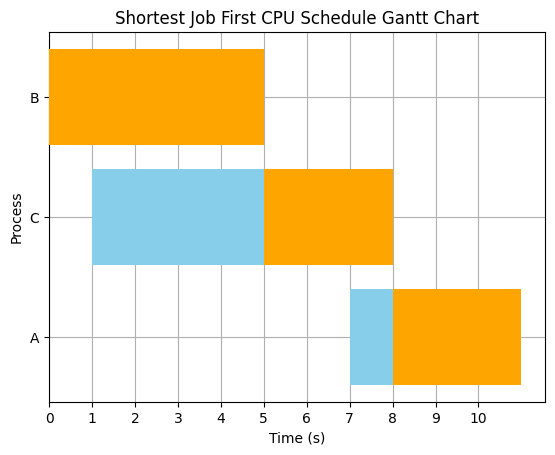

In [ ]:
# Plot Gantt Chart
df = finalProcess.to_dataFrame()
fig, gnt = plt.subplots()

plt.barh(y=df['Process'], width=df['Burst'], left=df['Arrival'] + df['Waiting'], color="orange", label="Burst Time", zorder=3)
plt.barh(y=df['Process'], width=df['Waiting'], left=df['Arrival'], color="skyblue", label="Waiting Time", zorder=3)

plt.title("Shortest Job First CPU Schedule Gantt Chart")
plt.gca().invert_yaxis()
gnt.grid(True, zorder=1)
gnt.set_ylabel("Process")
gnt.set_xlabel("Time (s)")
gnt.set_xticks(range(0, int(finalProcess.totalTime)))
gnt.set_xticklabels(range(0, int(finalProcess.totalTime), 3), minor=False, rotation=0, fontsize=None)

plt.legend(title="Time Type")
plt.show()

In [ ]:
print("Average Waiting Time:", finalProcess.calculateAverageWaitingTime(), "s")
print("Total Time:", int(finalProcess.totalTime), "s")

Average Waiting Time: 1.6666666666666667 s
Total Time: 11 s
